In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [74]:
from google.colab import files
uploaded = files.upload()


Saving processed.cleveland.data to processed.cleveland (1).data


In [75]:
import pandas as pd
import numpy as np

# Use the exact uploaded filename
file_name = "processed.cleveland.data"

# Define column names based on UCI documentation
columns = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach",
    "exang", "oldpeak", "slope", "ca", "thal", "target"
]

# Load the data
data = pd.read_csv(file_name, names=columns)

# Replace '?' with NaN and convert everything to numeric
data.replace("?", np.nan, inplace=True)
data = data.apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values
data.dropna(inplace=True)

# Check data
print("Cleaned DataFrame shape:", data.shape)
print(data.head())


Cleaned DataFrame shape: (297, 14)
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  target  
0    3.0  0.0   6.0       0  
1    2.0  3.0   3.0       2  
2    2.0  2.0   7.0       1  
3    3.0  0.0   3.0       0  
4    1.0  0.0   3.0       0  


<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  target    297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 34.8 KB
None
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


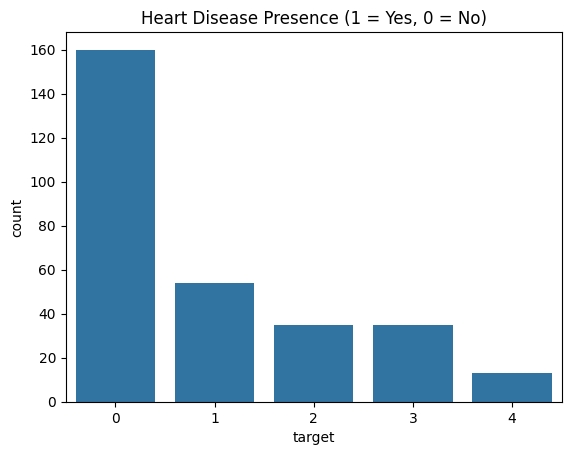

In [76]:
# Basic info
print(data.info())
print(data.isnull().sum())

# Check class balance
sns.countplot(x='target', data=data)
plt.title("Heart Disease Presence (1 = Yes, 0 = No)")
plt.show()


In [77]:
# Split features and target
X = data.drop("target", axis=1)
y = data["target"]

# Convert target to binary: 0 = no disease, 1+ = disease
y = y.apply(lambda x: 1 if x > 0 else 0)


In [78]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features and target
X = data.drop('target', axis=1)
y = data['target']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [79]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6
Confusion Matrix:
 [[35  1  0  0  0]
 [ 5  0  3  1  0]
 [ 2  1  1  1  0]
 [ 1  3  2  0  1]
 [ 1  1  0  1  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.97      0.88        36
           1       0.00      0.00      0.00         9
           2       0.17      0.20      0.18         5
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         3

    accuracy                           0.60        60
   macro avg       0.19      0.23      0.21        60
weighted avg       0.49      0.60      0.54        60



In [81]:
import pickle

# Save model
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

# Save scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("✅ Model and scaler saved successfully.")


✅ Model and scaler saved successfully.


In [82]:
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

In [60]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
import pydot

In [61]:
!pip install cartopy
import cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 15.4 MB/s eta 0:00:00


In [63]:
!pip install matplotlib-venn

In [64]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


In [66]:
!pip install streamlit pyngrok


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 48.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 70.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.4 MB/s eta 0:00:00


In [83]:
with open("app.py", "w") as f:
    f.write("""
import streamlit as st
import numpy as np
import pickle

model = pickle.load(open("model.pkl", "rb"))
scaler = pickle.load(open("scaler.pkl", "rb"))

st.title("🫀 Heart Disease Prediction App")

age = st.number_input("Age", min_value=1, max_value=120, value=45)
sex = st.selectbox("Sex", ["Male", "Female"])
cp = st.selectbox("Chest Pain Type (0-3)", [0, 1, 2, 3])
trestbps = st.number_input("Resting Blood Pressure", 80, 200)
chol = st.number_input("Cholesterol", 100, 600)
fbs = st.selectbox("Fasting Blood Sugar > 120 mg/dl", ["Yes", "No"])
restecg = st.selectbox("Resting ECG Results", [0, 1, 2])
thalach = st.number_input("Max Heart Rate", 60, 220)
exang = st.selectbox("Exercise Induced Angina", ["Yes", "No"])
oldpeak = st.number_input("ST Depression", 0.0, 6.0)
slope = st.selectbox("Slope", [0, 1, 2])
ca = st.selectbox("Number of Major Vessels", [0, 1, 2, 3])
thal = st.selectbox("Thalassemia", [1, 2, 3])

sex = 1 if sex == "Male" else 0
fbs = 1 if fbs == "Yes" else 0
exang = 1 if exang == "Yes" else 0

input_data = np.array([[age, sex, cp, trestbps, chol, fbs, restecg,
                        thalach, exang, oldpeak, slope, ca, thal]])
scaled_data = scaler.transform(input_data)

if st.button("Predict"):
    result = model.predict(scaled_data)[0]
    if result == 1:
        st.error("🚨 High Risk of Heart Disease")
    else:
        st.success("✅ Low Risk of Heart Disease")
""")


In [85]:
from pyngrok import ngrok
import threading
import time

# Kill any old ngrok tunnels
ngrok.kill()


# Authenticate ngrok with your authtoken
# Replace "YOUR_NGROK_AUTHTOKEN" with your actual authtoken
ngrok.set_auth_token("2xJB0cWnaUBOSfx0bLq7if7sKGe_4nKqWXy8mAsGik9NjTDjN")

# Start ngrok tunnel
public_url = ngrok.connect(addr=8501)
print("🌐 Your app is live at:", public_url)

# Start Streamlit app
def run():
    !streamlit run app.py

threading.Thread(target=run).start()
time.sleep(10)


🌐 Your app is live at: NgrokTunnel: "https://9da7-34-23-37-16.ngrok-free.app" -> "http://localhost:8501"



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8502
  Network URL: http://172.28.0.12:8502
  External URL: http://34.23.37.16:8502

